In [146]:
import json
from urllib.request import urlopen, Request
import pandas as pd

In [147]:
def read_url(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.3'}
    req_url = Request(url=url, headers=headers)
    json_txt = json.loads(urlopen(req_url).read())
    return json_txt

def get_coin_info(coin_name):
    coin_map = read_url('https://whattomine.com/calculators.json')
    try:
        map_id = coin_map['coins'][coin_name]['id']
        coin_json = read_json_url('https://whattomine.com/coins/' + str(map_id) + '.json')
        return coin_json
    except KeyError:
        print('Select from list of available coins:')
        print(coin_map['coins'].keys())
        return coin_map['coins'].keys()

def get_coin_with_algorithm(algorithm):
    coin_map = read_url('https://whattomine.com/calculators.json')
    algo_list = []
    coin_list = []
    for coin in coin_map['coins'].keys():
        algo = coin_map['coins'][coin]['algorithm']
        algo_list.append(algo)
        if algo == algorithm:
            coin_list.append(coin)
    if not coin_list:
        print('No coins available with selected algorithm.')
        print('Available algorithms are:')
        print(sorted(set(algo_list)))
        return set(algo_list)
    return coin_list
        

In [150]:
df = pd.json_normalize(get_coin_info('Cardano'))


Select from list of available coins:
dict_keys(['0xBitcoin', '365Coin', 'Aced', 'Actinium', 'Aiden', 'Adzcoin', 'Aeternity', 'Aeon', 'Argoneum', 'Aion', 'Ambercoin', 'Amsterdamcoin', 'Anon', 'ARG-SHA', 'ARG-Scrypt', 'Aricoin', 'Pirate', 'AUR-Scrypt', 'AUR-SHA', 'Axe', 'Azart', 'BitcoinDiamond', 'BitcoinCash', 'Bitcoin Interest', 'Bytecoin', 'Beam', 'Belacoin', 'Bitgesell', 'Bipcoin', 'Bismuth', 'BitCash', 'Bloc', 'Dobbscoin', 'BitSend', 'BlockStamp', 'GlobalBoost-Y', 'BitcoinSV', 'Bata', 'Bitcoin', 'BitcoinPrivate', 'BitcoinZ', 'BitcoinGold', 'Bytom', 'Bitmark', 'Bitcore', 'Burnercoin', 'Bulwark', 'Cachecoin', 'Cannabiscoin', 'BottleCaps', 'Litecash', 'Catcoin', 'Bullion', 'Conceal', 'Conflux', 'X-Children', 'Nervos', 'Checkcoin', 'Callisto', 'Cloakcoin', 'Commercium', 'CRowdCLassic', 'Creativecoin', 'Creamcoin', 'CrocodileCash', 'Crown', 'Cryptcoin', 'Crypto', 'Cortex', 'Curecoin', 'Denarius', 'Dash', 'Dubaicoin', 'Decred', 'Dinastycoin', 'Deutsche eMark', 'Dero', 'DGB-Scrypt', 'DGB-Q

AttributeError: 'str' object has no attribute 'values'

In [149]:
df

,id,name,tag,algorithm,block_time,block_reward,block_reward24,block_reward3,block_reward7,last_block,...,estimated_rewards,btc_revenue,revenue,cost,profit,status,lagging,testing,listed,timestamp
0,1,Bitcoin,BTC,SHA-256,478.0,6.300364,6.303379,6.344516,6.33721,696003,...,0.000570,0.00057032,$27.03,$6.72,$20.31,Active,False,False,True,1629085256


In [145]:
df = pd.DataFrame()
for coin in coin_map['coins'].keys():
    try:
        df = pd.concat([df, pd.json_normalize(get_coin_info(coin))])
    except:
        pause(5)
        print('skipping', coin,'...')

NameError: name 'pause' is not defined

In [144]:
get_coin_info('Monero')

{'id': 101,
 'name': 'Monero',
 'tag': 'XMR',
 'algorithm': 'RandomX',
 'block_time': '119.0',
 'block_reward': 0.911317566201,
 'block_reward24': 0.916563102139242,
 'block_reward3': 0.9171761797870848,
 'block_reward7': 0.9209552874018085,
 'last_block': 2424167,
 'difficulty': 319294256740.0,
 'difficulty24': 318141654164.922,
 'difficulty3': 320686656573.5353,
 'difficulty7': 318520252375.7229,
 'nethash': 2683145014,
 'exchange_rate': 0.005791,
 'exchange_rate24': 0.00582912952646239,
 'exchange_rate3': 0.005929617712524504,
 'exchange_rate7': 0.0060471724720343074,
 'exchange_rate_vol': 228.53420368,
 'exchange_rate_curr': 'BTC',
 'market_cap': '$4,686,349,263',
 'pool_fee': '0.000000',
 'estimated_rewards': '0.000349',
 'btc_revenue': '0.00000202',
 'revenue': '$0.09',
 'cost': '$0.65',
 'profit': '-$0.56',
 'status': 'Active',
 'lagging': False,
 'testing': False,
 'listed': True,
 'timestamp': 1628618064}

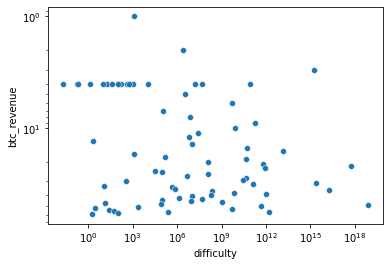

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='difficulty', y='btc_revenue', data=df)
plt.xscale('log')
plt.yscale('log')
plt.show()